90


Transforming over 1000 elements to C_CONTIGUOUS.


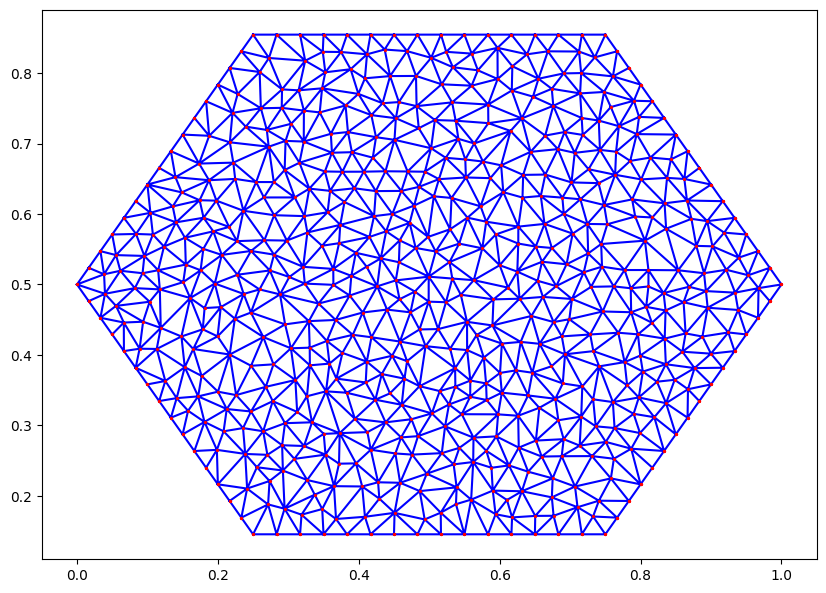

In [49]:
import matplotlib.pyplot as plt
import skfem
import random
from scipy.spatial import Delaunay
import numpy as np
from skfem import MeshTri
from scipy.spatial import distance
from scipy.sparse.linalg import splu  # for sparse matrices, 
# returns something like invA with LU decomp which can be applied with solve to solve Ax = b for x
'''from matplotlib.patches import Polygon
from matplotlib.path import Path
from skfem.models.poisson import laplace, mass
from skfem.visuals.matplotlib import plot'''
from shapely.geometry import Polygon,Point

vertices = np.array([[1,0.5],[0.7500,0.8546],[0.25,0.8546],[0,0.5],[0.25,0.1454],[0.75,0.1454]])

def generate_boundary_points(vertices,num_points_per_side):
    points = []
    for i in range(6):
        start_vertex = vertices[i]
        end_vertex = vertices[(i+1)%6]
        for j in range(num_points_per_side):
            t = j / num_points_per_side
            point = (1 - t) * start_vertex + t * end_vertex
            points.append(point)
    return np.array(points)
def generate_interior_points(vertices,num_points, min_distance,boundary_points):
    hexagon = Polygon(vertices)
    x_min, y_min, x_max, y_max = hexagon.bounds
    x_points, y_points = [], []
    def is_inside_hexagon(x,y):
        return hexagon.contains(Point(x,y))
    points = boundary_points.tolist()
    '''points = []'''
    while len(points) < num_points:
        x_rand = np.random.uniform(x_min, x_max)
        y_rand = np.random.uniform(y_min, y_max)
        #point = []
        pt = np.array([x_rand,y_rand])
        if is_inside_hexagon(x_rand, y_rand):
            '''if all(np.linalg.norm(np.array([x_rand, y_rand]) - np.array([xp, yp])) >= min_distance for xp, yp in zip(x_points, y_points)):'''"How do we represent probability in precise mathematics.pdf"
            if all(distance.euclidean(pt, p) >= min_distance for p in points):
                '''point.append(x_rand)
                point.append(y_rand)'''
                points.append(pt)
                #x_points.append(x_rand)
                #y_points.append(y_rand)
                
    return np.array(points)


minimum_distance = 0.0225
num_points_per_side = 15
boundary_points = generate_boundary_points(vertices,num_points_per_side)
print(len(boundary_points))
num_points = 600
interior_points = generate_interior_points(vertices,num_points,minimum_distance,boundary_points)

all_points = np.vstack((boundary_points,interior_points))
tri = Delaunay(all_points)
mesh = MeshTri(all_points.T,tri.simplices.T)

plt.triplot(all_points[:, 0], all_points[:, 1], tri.simplices, color='blue')
plt.scatter(all_points[:, 0], all_points[:, 1], color='red', s=1.75)
plt.gca().set_aspect(1.0)
fig = plt.gcf()
fig.set_size_inches(10, 10)
plt.show()